# L05 - Decision Trees

## Author - Rodolfo Lerma

# Dataset Background

The Breast Cancer Wisconsin Data Set data were obtained from the University of Wisconsin Hospitals, Madison. Donors:

    Dr. William H. Wolberg, General Surgery Dept.
    W. Nick Street, Computer Sciences Dept.
    Olvi L. Mangasarian, Computer Sciences Dept.

They contain the simplified and normalized attributes used to detect breast cancer. 
Attributes:
- Sample code number: id number
- Class (4 for malignant, 2 for benign)
- Clump Thickness: 1 - 10
- Uniformity of Cell Size: 1 - 10
- Uniformity of Cell Shape: 1 - 10
- Marginal Adhesion: 1 - 10
- Single Epithelial Cell Size: 1 - 10
- Bare Nuclei: 1 - 10
- Bland Chromatin: 1 - 10
- Normal Nucleoli: 1 - 10
- Mitosis

# Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the WI_Breast_Cancer csv file, create a new notebook to build a decision tree classifier that would be able to detect whether a tumor is benign or malignant. Complete the following tasks and answer the questions:

- Test both entropy and the gini coefficient. Which performs better and why?
- What are the best hyperparameter settings for both?
- Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not?
- Determine the AUC for the best model you can achieve. What are the precision and recal values and which might be the one you want to maximize?
- What are the implications of using this type of machine learning algorithm for breast cancer analysis?

# Problem

# Abstract:

### Data exploration.
- **Adding column names to the data**

### Feature Selection.
- **1st Method: Filter Method**
    - Correlation
    - Mutual Information

### Evaluation of the Features.
- **Train & Test Model**
- **Evaluate Model Performance**
    - Model using using Filter Methods

### Summary/Conclusions.

# Data exploration

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Load File
filename = 'WI_Breast_Cancer.csv'
df = pd.read_csv(filename, header = None)
#Names based on the information provided by the website
df.columns = ['id', 'class', 'clump', 'cell_size','cell_shape', 'adhesion', 'epithelial_size', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']

In [3]:
df.head()

,id,class,clump,cell_size,cell_shape,adhesion,epithelial_size,nuclei,chromatin,nucleoli,mitosis
0,1000025,2,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,1002945,2,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,1015425,2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,1016277,2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,1017023,2,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1


In [4]:
df.shape

(709, 11)

In [5]:
df.dtypes

id                  object
class               object
clump              float64
cell_size          float64
cell_shape         float64
adhesion           float64
epithelial_size    float64
nuclei             float64
chromatin          float64
nucleoli           float64
mitosis             object
dtype: object

It seems that there are some rows in the `id`, `class` & `mitosis` columns with some incorrect data

In [6]:
df['class'].unique()

array(['2', '4', nan, ' 1990; Updated Jan 8'], dtype=object)

In [7]:
df['id'].unique()

array(['1000025', '1002945', '1015425', '1016277', '1017023', '1017122',
       '1018099', '1018561', '1033078', '1035283', '1036172', '1041801',
       '1043999', '1044572', '1047630', '1048672', '1049815', '1050670',
       '1050718', '1054590', '1054593', '1056784', '1057013', '1059552',
       '1065726', '1066373', '1066979', '1067444', '1070935', '1071760',
       '1072179', '1074610', '1075123', '1079304', '1080185', '1081791',
       '1084584', '1091262', '1096800', '1099510', '1100524', '1102573',
       '1103608', '1103722', '1105257', '1105524', '1106095', '1106829',
       '1108370', '1108449', '1110102', '1110503', '1110524', '1111249',
       '1112209', '1113038', '1113483', '1113906', '1115282', '1115293',
       '1116116', '1116132', '1116192', '1116998', '1117152', '1118039',
       '1120559', '1121732', '1121919', '1123061', '1124651', '1125035',
       '1126417', '1131294', '1132347', '1133041', '1133136', '1136142',
       '1137156', '1143978', '1147044', '1147699', 

From the couple of examples above it is possible to notice that between the lines we have some headlines dividing the groups of data that form part of the Data Set. That needs to be removed.

## Data Cleaning

As explore above there are some headlines in between rows that need to be removed. In the code below these lines are going to be selected and then the rows for those lines will be dropped. 

In [8]:
contain_values = df[df['id'].str.contains('#')]
x = contain_values.iloc[:,0].index
index_data = x.tolist()
df = df.drop(df.index[index_data])
df = df.dropna()

In [9]:
df["mitosis"] = df['mitosis'].astype(float)
df["class"] = df['class'].astype(float)

In [10]:
df.dtypes

id                  object
class              float64
clump              float64
cell_size          float64
cell_shape         float64
adhesion           float64
epithelial_size    float64
nuclei             float64
chromatin          float64
nucleoli           float64
mitosis            float64
dtype: object

In [11]:
df.shape

(699, 11)

As seen in the number above the Data Frame went from 709 to 699, which coincides with the headlines that needed to be removed.

### Visual Exploration of the Target Variable: `class`

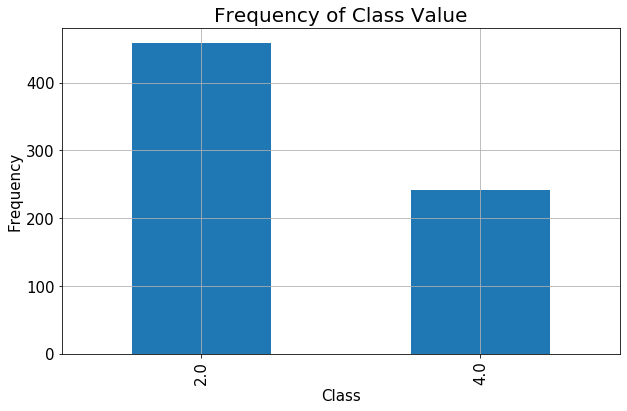

In [12]:
df['class'].value_counts().plot(kind='bar',figsize = (10,6))
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Frequency of Class Value', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [13]:
df['class'].value_counts()

2.0    458
4.0    241
Name: class, dtype: int64

As noted in the website from this dataset class 4 is to identify a malignant tumor and class 2 for a benign one. From the plot and numbers above we see that there is a small class imbalance as the class 4.0 is little bit more than half of the class 2.0.

# Feature selection

## Correlation

In [14]:
numerical = ['class', 'clump', 'cell_size','cell_shape', 'adhesion', 'epithelial_size', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']
df_numeric = df[numerical]
correlations_df = df_numeric.corr()
df_correlations = correlations_df['class']
df_correlations = pd.DataFrame(data=df_correlations)
df_correlations['Corr_Abs'] = abs(df_correlations['class'])

min_corr = min(df_correlations['Corr_Abs'])
max_corr = max(df_correlations['Corr_Abs'][1:])
print('Max correlation value is = ' + str(round(max_corr, 4)))
print('Min correlation value is = ' + str(round(min_corr, 4)))

#list: High correlation and low correlation
df_correlations.reset_index(inplace=True)
high_correlated_features = []
low_correlated_features = []
for i in range(len(df_correlations['Corr_Abs'])):
    p = df_correlations.iloc[i,2]
    if p >= 0.5:
        l = df_correlations.iloc[i,0]
        high_correlated_features.append(l)
    else:
        r = df_correlations.iloc[i,0]
        low_correlated_features.append(r)
        
high_correlated_features.remove('class')
len_corr = len(high_correlated_features)
print('# of Features using Correlation: ' + str(len_corr))

Max correlation value is = 0.8189
Min correlation value is = 0.4232
# of Features using Correlation: 8


In [16]:
# high_correlated_features.remove('class')
# len_corr = len(high_correlated_features)
# print('# of Features using Correlation: ' + str(len_corr))

## Mutual Information

In [17]:
from sklearn.metrics import mutual_info_score
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

mutual_values = []
for i in range(len(df_numeric.iloc[1])):
    X = df_numeric.iloc[:,i].tolist()
    Y = df_numeric.iloc[:,0].tolist()
    mi = calc_MI(X, Y, 20)
    mutual_values.append(mi)
my_list_mutual = df_numeric.columns.values.tolist()    
mutual_info_dict = dict(zip(my_list_mutual, mutual_values))
mutual_info_dict_sorted = sorted(mutual_info_dict.items(), key=lambda x: x[1], reverse = True)
df_correlations['Mutual_info'] = mutual_values

min_mi = min(df_correlations['Mutual_info'])
max_mi = max(df_correlations['Mutual_info'][1:])

print('Max mi value is = ' + str(round(max_mi, 4)))
print('Min mi value is = ' + str(round(min_mi, 4)))

#List: High mi and low mi
high_mi_features = []
low_mi_features = []
for i in range(len(df_correlations['Mutual_info'])):
    w = df_correlations.iloc[i,3]
    if w >= 0.1:
        q = df_correlations.iloc[i,0]
        high_mi_features.append(q)
    else:
        k = df_correlations.iloc[i,0]
        low_mi_features.append(k)
high_mi_features.remove('class')
len_mi = len(high_mi_features)
print('# of Features using MI: ' + str(len_mi))

Max mi value is = 0.4743
Min mi value is = 0.1456
# of Features using MI: 9


In [18]:
# mutual_values = []
# for i in range(len(df_numeric.iloc[1])):
#     X = df_numeric.iloc[:,i].tolist()
#     Y = df_numeric.iloc[:,0].tolist()
#     mi = calc_MI(X, Y, 20)
#     mutual_values.append(mi)
# my_list_mutual = df_numeric.columns.values.tolist()    
# mutual_info_dict = dict(zip(my_list_mutual, mutual_values))
# mutual_info_dict_sorted = sorted(mutual_info_dict.items(), key=lambda x: x[1], reverse = True)
# df_correlations['Mutual_info'] = mutual_values

# min_mi = min(df_correlations['Mutual_info'])
# max_mi = max(df_correlations['Mutual_info'][1:])

# print('Max mi value is = ' + str(round(max_mi, 4)))
# print('Min mi value is = ' + str(round(min_mi, 4)))

In [19]:
# #List: High mi and low mi
# high_mi_features = []
# low_mi_features = []
# for i in range(len(df_correlations['Mutual_info'])):
#     w = df_correlations.iloc[i,3]
#     if w >= 0.1:
#         q = df_correlations.iloc[i,0]
#         high_mi_features.append(q)
#     else:
#         k = df_correlations.iloc[i,0]
#         low_mi_features.append(k)
# high_mi_features.remove('class')
# len_mi = len(high_mi_features)
# print('# of Features using MI: ' + str(len_mi))

### Stepwise Model Selection

In [20]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

In [21]:
estimator = LinearRegression()
selector = RFE(estimator, 20, step=1)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [22]:
df_numeric_copy = df_numeric.copy()

target = df_numeric.iloc[:,0]#This is the selection of the Target Variables
df_updated = df_numeric_copy.drop('class', axis='columns')

lol = df_updated.values.tolist()
selector = selector.fit(lol, target)

boolean_values = selector.support_
ranking_values = selector.ranking_
wrapper_columns = df_updated.columns.values.tolist()

#Selection of the features with ranking 1
selected_features = []
unselected_features = []
for i in range(len(wrapper_columns)):
    w = boolean_values[i]
    if w == True:
        b = wrapper_columns[i]
        selected_features.append(b)
    else:
        v = wrapper_columns[i]
        unselected_features.append(v)
        
len_selected = len(selected_features)
print('# of Features using BACKWARD: ' + str(len_selected))

# of Features using BACKWARD: 9


### LASSO

In [23]:
# LASSO
from sklearn import linear_model
alpha = 0.001 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)

In [24]:
clf.fit(lol, target)
lasso_coef = clf.coef_
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

Sum of square of coefficients = 0.02


In [25]:
#Selection of the non zero coefficients from the LASSO regression
lasso_features = []
non_lasso_features = []
for i in range(len(wrapper_columns)):
    w = lasso_coef[i]
    if w != 0:
        u = wrapper_columns[i]
        lasso_features.append(u)
    else:
        t = wrapper_columns[i]
        non_lasso_features.append(t)
        
len_lasso = len(lasso_features)
print('# of Features using LASSO: ' + str(len_lasso))

# of Features using LASSO: 9


## Evaluation/Selection of features

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [27]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors

#List for Classifiers and Names
header = ["K_Nearest_Neighbors"]
V = [knn]

tr = df.iloc[:,1].tolist()
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b == 4: #Malign tumor
        n = 0
    else:
        n = 1
    binomial.append(n)
df['target_binomial'] = binomial

## Class imbalace

In [28]:
#Split the data for variables with high mi value
label = df['target_binomial']
correlation_variables = df[high_correlated_features]
mi_variables = df[high_mi_features]
stepwise_variables = df[selected_features]
lasso_variables = df[lasso_features]

In [29]:
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(mi_variables, label, test_size=0.30, random_state=42)
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(stepwise_variables, label, test_size=0.30, random_state=42)
X_train_la, X_test_la, y_train_la, y_test_la = train_test_split(lasso_variables, label, test_size=0.30, random_state=42)

In [30]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [31]:
sm = SMOTE(random_state=42)
variables_mi_sm, label_mi_sm = sm.fit_resample(mi_variables, label)
variables_sp_sm, label_sp_sm = sm.fit_resample(stepwise_variables, label)
variables_la_sm, label_la_sm = sm.fit_resample(lasso_variables, label)

#Split the data
X_train_mi_sm, X_test_mi_sm, y_train_mi_sm, y_test_mi_sm = train_test_split(variables_mi_sm, label_mi_sm, test_size=0.30, random_state=42)
X_train_sp_sm, X_test_sp_sm, y_train_sp_sm, y_test_sp_sm = train_test_split(variables_sp_sm, label_sp_sm, test_size=0.30, random_state=42)
X_train_la_sm, X_test_la_sm, y_train_la_sm, y_test_la_sm = train_test_split(variables_la_sm, label_la_sm, test_size=0.30, random_state=42)

In [32]:
#unction to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    #print("Classifier: ", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    #print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    #print (" ")
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.values.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        allvalues = [AR, ER, P, R, F1]
    return allvalues

### Evaluation of the different Features

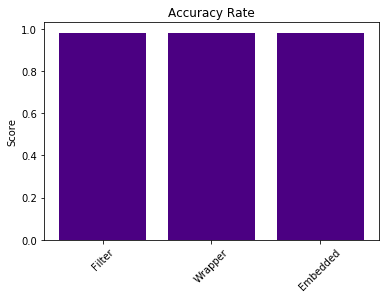

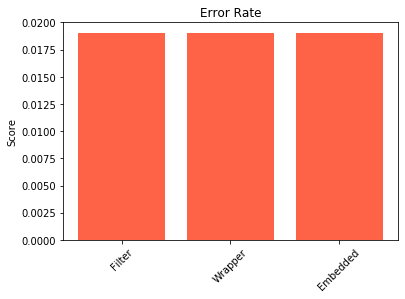

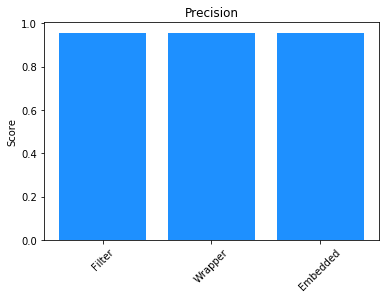

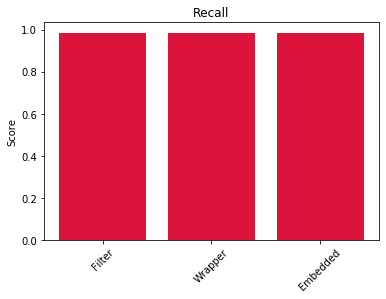

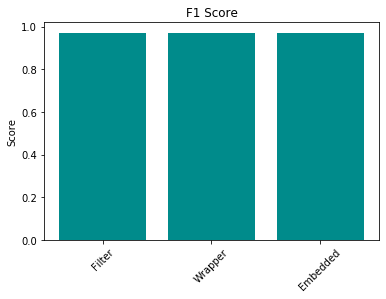

In [33]:
filters = classifier_performance(V, header, X_train_mi_sm, X_test_mi, y_train_mi_sm, y_test_mi)
wrappers = classifier_performance(V, header, X_train_sp_sm, X_test_sp, y_train_sp_sm, y_test_sp)
embedded = classifier_performance(V, header, X_train_la_sm, X_test_la, y_train_la_sm, y_test_la)

comparison_list = [filters,wrappers,embedded]
names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
header = ["Filter","Wrapper","Embedded"]    
#Plots of each of the Performance Values for each of the Classifiers in this analysis
for i in range(len(names)):
    x = [item[i] for item in comparison_list]
    plt.bar(header, x, color=colors[i])
    plt.xticks(rotation=45)
    plt.title(names[i])
    plt.ylabel("Score")
    plt.show()

## Decision Tree Method

In [34]:
from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
dtc_ent = DecisionTreeClassifier(criterion='entropy').fit(X_train_la_sm, y_train_la_sm) 
y_dtc_ent_pred = dtc_ent.predict(X_test_la)

# Use information gain (default) limit min_samples to 4
dtc_gini = DecisionTreeClassifier(min_samples_leaf=6).fit(X_train_la_sm, y_train_la_sm)
y_dtc_gini_pred = dtc_gini.predict(X_test_la)

In [35]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test_la, y_dtc_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test_la, y_dtc_gini_pred)*100))

Entropy accuracy is : 97.14285714285714%
Gini accuracy is : 96.66666666666667%


In [36]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test_la, y_dtc_gini_pred),
    columns=['Predicted Malignant', 'Predicted Benign'],
    index=['True Malignant', 'True Benign']
)

,Predicted Malignant,Predicted Benign
True Malignant,66,1
True Benign,6,137


# Conclusions


- Test both entropy and the gini coefficient. Which performs better and why?
- What are the best hyperparameter settings for both?
- Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not?
- Determine the AUC for the best model you can achieve. What are the precision and recal values and which might be the one you want to maximize?
- What are the implications of using this type of machine learning algorithm for breast cancer analysis?
